In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import keila_wrangle as w

# Project Description
We will be analyzing, factors that affect wine quality. Our objective is to build a predictive model that can estimate the quality of a given wine. The focus here is to gain insights and understanding about the factors influencing wine quality rather than generating practical predictions.

# Project Goal

* We will be analyzing, exploring the different attributes affecting red and white wine quality. 
* We will be creating a model based on to predict the quality of the wine.
* This data would not be used on future properties or for real life prediction.

# Initial Thoughts

The initial hypothesis for this project is that certain factors such as 'alcohol', 'chlorides', 'ph', 'residual sugar', 'density' may be significant drivers of wine quality.


# Acquire
* Aquire dataset from [Data.World: Wine Quality](https://data.world/food/wine-quality)
* It contains two datasets: winequality-red.csv (1599 rows × 12 columns) & winequality-white.csv (4898 rows × 12 columns) 
* Each row represents a unique wine
* Each column represents a feature of those wines.

# Prepare
- Prepare Actions:
    * Fixed columns names to promote readability
    * Checked for nulls in the data. No nulls were found.
    * Checked that column data types were appropriate
    * Added wine_type column, which identifies if the wine is red or white
    * Added quality_type column, which identifies if the wine is low <= 5 quality or high > 5 quality
    * Encoded categorical variables
    * Split data into train, validate and test (approx. 60/20/20)
    * 578 outliers have been removed for the iteration of the project, based on if they fell outside the 4 standard deviation

In [7]:
# acquire, prep, and clean data
train, validate, test = w.clean_wine()

128 outliers removed from fixed acidity.
94 outliers removed from volatile acidity.
66 outliers removed from citric acid.
24 outliers removed from residual sugar.
108 outliers removed from chlorides.
36 outliers removed from free sulfur dioxide.
5 outliers removed from total sulfur dioxide.
0 outliers removed from density.
34 outliers removed from pH.
62 outliers removed from sulphates.
1 outliers removed from alcohol.
20 outliers removed from quality.
0 outliers removed from red_wine.

Total of 578 outliers removed.


# Summarize df

In [8]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,red_wine,wine_type,quality_type
1961,9.5,0.21,0.47,1.3,0.039,21.0,123.0,0.99590,2.90,0.64,9.5,5,0,white,low
3624,6.6,0.36,0.28,6.1,0.029,12.0,93.0,0.99054,3.19,0.27,12.8,7,0,white,high
216,7.5,0.27,0.36,7.0,0.036,45.0,164.0,0.99390,3.03,0.33,11.0,5,0,white,low
657,7.3,0.34,0.21,3.2,0.050,14.0,136.0,0.99360,3.25,0.44,10.2,5,0,white,low
1571,7.4,0.30,0.49,8.2,0.055,49.0,188.0,0.99740,3.52,0.58,9.7,6,0,white,high


# Explore

## Does Alcohol Affect Wine Quality?

In [10]:
 alc, res, cholrides,  
failed ph

SyntaxError: invalid syntax (2439406348.py, line 2)

## Does Residual Sugar Affect Wine Quality?
$H_o$: Mean of 'residual_sugar' for low quality wines <= Mean of 'residual_sugar' for high quality wines

$H_a$: Mean of 'residual_sugar' for low quality wines > Mean of 'residual_sugar' for high quality wines

In [16]:
def sugar_barplot(df):
    '''
    This function creates a custom bar chart for comparing homes with pools and homes without pools
    '''
    fig, ax =plt.subplots()
    
    # set color palette
    sns.set_palette("pastel")
    
    # create average line    
    plt.title("Low Quality Wine has More Sugar")
    sns.barplot(x="quality_type", y="residual_sugar", data=df, hue='wine_type')
    plt.xlabel("Quality")
    plt.ylabel("Amount of Sugar")
    tick_label = ["Low", "High"]
    ax.set_xticklabels(tick_label)
    property_value_average = df.residual_sugar.mean()
    plt.axhline(property_value_average, label="Residual Sugar Average", color='DarkSlateBlue')
    plt.legend(loc='upper right')
    plt.show()

In [20]:
train.residual_sugar.value_counts()

1.80     122
1.20     119
1.40     115
1.60     115
2.00     114
        ... 
17.40      1
8.55       1
6.35       1
12.75      1
17.75      1
Name: residual_sugar, Length: 267, dtype: int64

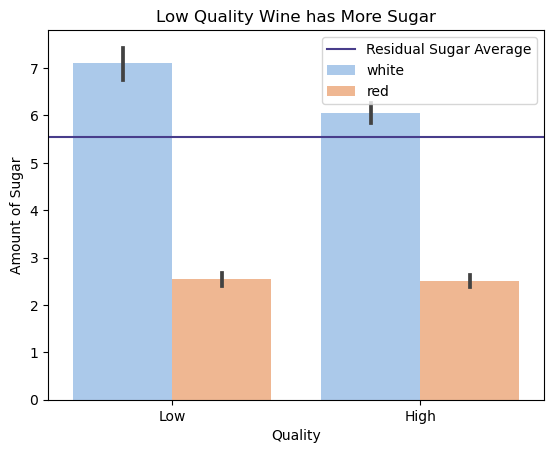

In [17]:
sugar_barplot(train)

## Does Chlorides Affect Wine Quality?

## Does ph Affect Wine Quality?